Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [5]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

In [6]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv('movies.csv')


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [7]:
# code here
movies_df.drop(['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'],axis = 1, inplace = True)

In [8]:
movies_df.columns

Index(['budget', 'genres', 'id', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

#### Remove any duplicate rows

In [9]:
# code here
movies_df.loc[movies_df['id'].duplicated() == True ]

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count


In [10]:
# There are no duplicate rows

#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [11]:
# Code here
movies_df['budget'].apply(lambda x: type(x)).unique()  # confirm the datatype of the field
print(f'The number of rows before removal of zero budget {movies_df.shape[0]}.')
movies_df2 = movies_df.loc[movies_df['budget'] != 0,]
print(f'The number of rows after removal of zero budget {movies_df2.shape[0]}.')

The number of rows before removal of zero budget 4803.
The number of rows after removal of zero budget 3766.


#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [12]:
# Change the release_date column to DateTime column
movies_df2['release_year'] = pd.to_datetime(movies_df2['release_date'],format = '%Y-%m-%d')
movies_df2['release_year'] = movies_df2['release_year'].dt.year
# Extract the release year from every release date


C:\Users\HP\AppData\Local\Temp\ipykernel_16748\1795203844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df2['release_year'] = pd.to_datetime(movies_df2['release_date'],format = '%Y-%m-%d')
C:\Users\HP\AppData\Local\Temp\ipykernel_16748\1795203844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df2['release_year'] = movies_df2['release_year'].dt.year


#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [13]:
# code here
movies_df2['budget'] = movies_df2['budget'].astype(np.int64)
movies_df2['revenue'] = movies_df2['revenue'].astype(np.int64)

C:\Users\HP\AppData\Local\Temp\ipykernel_16748\203137557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df2['budget'] = movies_df2['budget'].astype(np.int64)
C:\Users\HP\AppData\Local\Temp\ipykernel_16748\203137557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df2['revenue'] = movies_df2['revenue'].astype(np.int64)


On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [14]:
movies_df['genres']

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

In [15]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df2.index,movies_df2[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df2.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
#parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

movies_df2.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [16]:
movies_df2['budget'].max()

380000000

In [17]:
# Code here
movies_df2['budget_rank'] = movies_df2['budget'].rank(ascending = False)
movies_df2.sort_values(by = ['budget_rank']).head(10)


C:\Users\HP\AppData\Local\Temp\ipykernel_16748\3521770817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df2['budget_rank'] = movies_df2['budget'].rank(ascending = False)


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,budget_rank
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011,1.0
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007,2.0
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015,3.0
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,2006,4.0
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012,5.5
6,260000000,"['Animation', 'Family']",38757,48.681969,['United States of America'],2010-11-24,591794936,100.0,['English'],Tangled,7.4,3330,2010,5.5
5,258000000,"['Fantasy', 'Action', 'Adventure']",559,115.699814,['United States of America'],2007-05-01,890871626,139.0,"['English', 'Français']",Spider-Man 3,5.9,3576,2007,7.0
13,255000000,"['Action', 'Adventure', 'Western']",57201,49.046956,['United States of America'],2013-07-03,89289910,149.0,['English'],The Lone Ranger,5.9,2311,2013,8.0
22,250000000,"['Adventure', 'Fantasy']",57158,94.370564,"['New Zealand', 'United States of America']",2013-12-11,958400000,161.0,['English'],The Hobbit: The Desolation of Smaug,7.6,4524,2013,12.5
98,250000000,"['Adventure', 'Fantasy', 'Action']",49051,108.849621,"['New Zealand', 'United States of America']",2012-11-26,1021103568,169.0,['English'],The Hobbit: An Unexpected Journey,7.0,8297,2012,12.5


#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [18]:
# code here
movies_df2['profit'] = movies_df2['revenue'] - movies_df2['budget']
movies_df2['profit_rank'] = movies_df2['profit'].rank(ascending = False)
movies_df2.sort_values(['profit_rank']).head(5)


C:\Users\HP\AppData\Local\Temp\ipykernel_16748\3345318022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df2['profit'] = movies_df2['revenue'] - movies_df2['budget']
C:\Users\HP\AppData\Local\Temp\ipykernel_16748\3345318022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df2['profit_rank'] = movies_df2['profit'].rank(ascending = False)


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,budget_rank,profit,profit_rank
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,18.0,2550965087,1.0
25,200000000,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,1997,37.5,1645034188,2.0
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],Jurassic World,6.5,8662,2015,124.0,1363528810,3.0
44,190000000,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],Furious 7,7.3,4176,2015,51.0,1316249360,4.0
16,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],The Avengers,7.4,11776,2012,22.0,1299557910,5.0


In [19]:
movies_df2.sort_values(['profit_rank']).tail(5)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,budget_rank,profit,profit_rank
1652,100000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",14164,21.677732,['United States of America'],2009-04-01,0,85.0,"['English', '日本語', 'हिन्दी']",Dragonball Evolution,2.9,462,2009,300.0,-100000000,3762.0
141,150000000,"['Adventure', 'Animation', 'Family']",50321,12.362599,['United States of America'],2011-03-09,38992758,88.0,['English'],Mars Needs Moms,5.5,199,2011,124.0,-111007242,3763.0
338,145000000,"['Western', 'History', 'War']",10733,10.660441,['United States of America'],2004-04-07,25819961,137.0,"['English', 'Español']",The Alamo,5.8,106,2004,149.5,-119180039,3764.0
135,150000000,"['Drama', 'Horror', 'Thriller']",7978,21.214571,['United States of America'],2010-02-11,0,102.0,['English'],The Wolfman,5.5,549,2010,124.0,-150000000,3765.0
13,255000000,"['Action', 'Adventure', 'Western']",57201,49.046956,['United States of America'],2013-07-03,89289910,149.0,['English'],The Lone Ranger,5.9,2311,2013,8.0,-165710090,3766.0


In [20]:
# max profit
print(f"The max profit is {movies_df2['profit'].max()} and the min is {movies_df2['profit'].min()}.")

The max profit is 2550965087 and the min is -165710090.


#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



In [21]:
# Code here
movies_df2 = movies_df2.sort_values(['popularity'], ascending = False)

movies_df2

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,budget_rank,profit,profit_rank
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,2015,544.5,1082730962,8.0
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,2014,89.0,510120017,95.0
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,2016,793.5,725112979,41.0
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,2014,81.0,603328629,66.0
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,2015,124.0,228858340,325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,4500000,"['Drama', 'Foreign', 'History']",17139,0.011697,"['Netherlands', 'Belgium']",1997-04-17,0,122.0,"['Nederlands', 'English', 'Français', 'Deutsch']",Character,7.7,25,1997,3159.0,-4500000,2854.5
4508,56000,['Documentary'],70875,0.010909,[],2011-07-29,0,80.0,[],The Harvest (La Cosecha),0.0,0,2011,3718.0,-56000,2477.0
3967,3,"['Drama', 'Comedy']",79587,0.008263,"['United States of America', 'Italy']",2009-01-15,0,100.0,"['Italiano', 'English']",Four Single Fathers,0.0,0,2009,3758.0,-3,2449.0
4626,300000,"['Romance', 'Comedy', 'Drama']",324352,0.006323,['United States of America'],2010-05-20,0,98.0,['English'],Anderson's Cross,0.0,0,2010,3665.5,-300000,2506.5


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [22]:
# Code here
movies_df2.sort_values(['profit_rank'])['release_year'].head(10)


0      2009
25     1997
28     2015
44     2015
16     2012
7      2015
124    2013
546    2015
329    2003
31     2013
Name: release_year, dtype: int64

In [23]:
movies_df2.sort_values(['profit_rank'])['release_year'].tail(10)

467     1998
376     1997
2638    1927
311     2002
208     1999
1652    2009
141     2011
338     2004
135     2010
13      2013
Name: release_year, dtype: int64

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

In [24]:
movies_df2['genres']

546        ['Family', 'Animation', 'Adventure', 'Comedy']
95              ['Adventure', 'Drama', 'Science Fiction']
788                     ['Action', 'Adventure', 'Comedy']
94             ['Action', 'Science Fiction', 'Adventure']
127     ['Action', 'Adventure', 'Science Fiction', 'Th...
                              ...                        
3708                      ['Drama', 'Foreign', 'History']
4508                                      ['Documentary']
3967                                  ['Drama', 'Comedy']
4626                       ['Romance', 'Comedy', 'Drama']
4509                                ['Drama', 'Thriller']
Name: genres, Length: 3766, dtype: object

In [25]:
 # Code here
countdf = movies_df2.groupby(['genres'])['genres'].count()
countdf = countdf.reset_index(name = "counts")
countdf['rank'] = countdf['counts'].rank(ascending = False)
countdf.sort_values(by = ['rank'],inplace = True)
countdf_high = countdf.head(10)
countdf_low = countdf.tail(20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, "['Drama']"),
  Text(1, 0, "['Comedy']"),
  Text(2, 0, "['Drama', 'Romance']"),
  Text(3, 0, "['Comedy', 'Romance']"),
  Text(4, 0, "['Comedy', 'Drama']"),
  Text(5, 0, "['Comedy', 'Drama', 'Romance']"),
  Text(6, 0, "['Horror', 'Thriller']"),
  Text(7, 0, "['Drama', 'Thriller']"),
  Text(8, 0, "['Horror']"),
  Text(9, 0, "['Crime', 'Drama', 'Thriller']")])

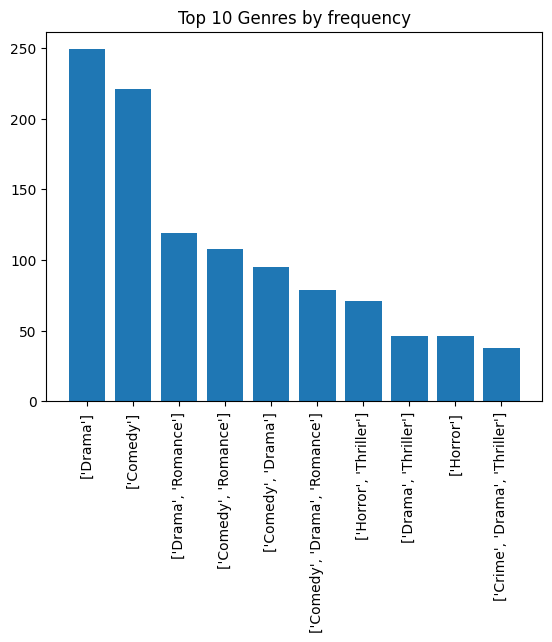

In [26]:
figsize=(8, 6)
plt.bar(countdf_high['genres'],countdf_high['counts'], width = 0.8)
plt.title('Top 10 Genres by frequency')
plt.xticks(rotation='vertical')

Text(0.5, 1.0, 'relationship between popularity and profit')

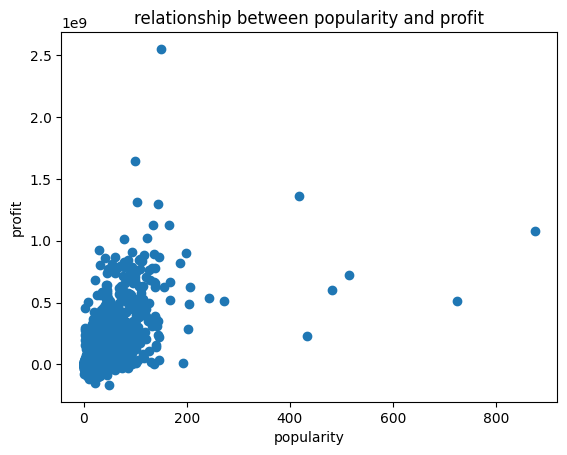

In [27]:
#### Generate three different interesting visualisations with a data story.
pd.set_option('display.max_rows',10000)
plt.scatter(movies_df2['popularity'],movies_df2['profit'])
plt.xlabel('popularity')
plt.ylabel('profit')
plt.title('relationship between popularity and profit')




([<matplotlib.axis.XTick at 0x20a99f13d30>,
 [Text(1916, 0, '1916'),
  Text(1919, 0, '1919'),
  Text(1922, 0, '1922'),
  Text(1925, 0, '1925'),
  Text(1928, 0, '1928'),
  Text(1931, 0, '1931'),
  Text(1934, 0, '1934'),
  Text(1937, 0, '1937'),
  Text(1940, 0, '1940'),
  Text(1943, 0, '1943'),
  Text(1946, 0, '1946'),
  Text(1949, 0, '1949'),
  Text(1952, 0, '1952'),
  Text(1955, 0, '1955'),
  Text(1958, 0, '1958'),
  Text(1961, 0, '1961'),
  Text(1964, 0, '1964'),
  Text(1967, 0, '1967'),
  Text(1970, 0, '1970'),
  Text(1973, 0, '1973'),
  Text(1976, 0, '1976'),
  Text(1979, 0, '1979'),
  Text(1982, 0, '1982'),
  Text(1985, 0, '1985'),
  Text(1988, 0, '1988'),
  Text(1991, 0, '1991'),
  Text(1994, 0, '1994'),
  Text(1997, 0, '1997'),
  Text(2000, 0, '2000'),
  Text(2003, 0, '2003'),
  Text(2006, 0, '2006'),
  Text(2009, 0, '2009'),
  Text(2012, 0, '2012'),
  Text(2015, 0, '2015')])

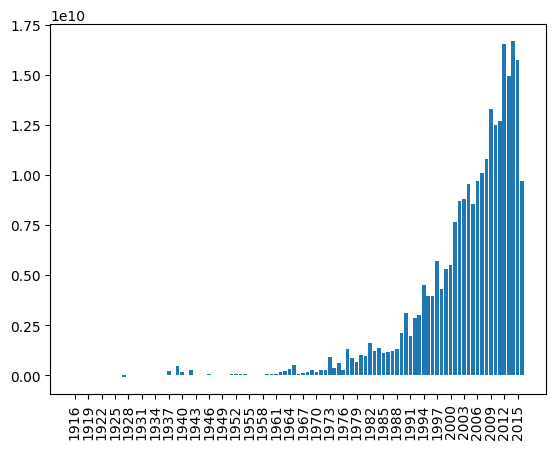

In [28]:
pie_year = movies_df2.groupby('release_year')['profit'].sum()
pie_year = pie_year.reset_index(name = 'total profit')
plt.bar(pie_year['release_year'],pie_year['total profit'])
plt.xticks(np.arange(1916, 2016, 3),rotation = 'vertical')


In [29]:
language = movies_df2.groupby(['spoken_languages'])['profit'].sum()
language = language.reset_index(name = 'profit')
language['rank'] = language['profit'].rank(ascending = False)
language = language.sort_values(by = ['rank'])
language_high = language.head(10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, "['English']"),
  Text(1, 0, "['English', 'Español']"),
  Text(2, 0, "['English', 'Français']"),
  Text(3, 0, "['English', 'Pусский']"),
  Text(4, 0, "['Español', 'English']"),
  Text(5, 0, "['English', '普通话']"),
  Text(6, 0, "['Français', 'English']"),
  Text(7, 0, "['English', 'Italiano']"),
  Text(8, 0, "['English', 'Français', 'Deutsch', 'svenska', 'Italiano', 'Pусский']"),
  Text(9, 0, "['English', 'Deutsch']")])

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  func(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  func(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 35805 (\N{CJK UNIFIED IDEOGRAPH-8BDD}) missing from current font.
  func(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: Us

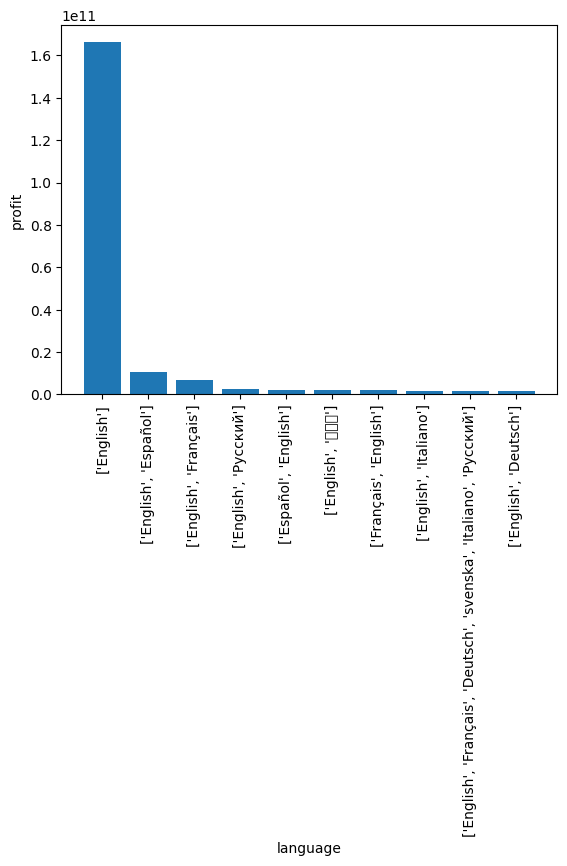

In [30]:
plt.bar(language_high['spoken_languages'],language_high['profit'])
plt.xlabel('language')
plt.ylabel('profit')
plt.xticks(rotation = 'vertical')

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)

In [31]:
cars = pd.read_csv('automobile.txt')

In [32]:
pd.set_option('display.max_rows',5000)

In [33]:
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## DATA CLEANING

In [34]:
# Detect duplicated rows
cars[cars.duplicated()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [35]:
# Finding null values per column
missing = pd.DataFrame({'Column':[],'Number of missing datapoints':[]})
for i in range(len(cars.columns)):
    missing.loc[i,['Column']] = cars.columns[i]
    missing.loc[i,['Number of missing datapoints']] = cars.iloc[:,i].isnull().sum()

# look at the # of missing points in the first ten columns
missing = missing.sort_values(by = ['Number of missing datapoints'],ascending = False)
missing.reset_index(inplace = True, drop = True)
missing

,Column,Number of missing datapoints
0,symboling,0.0
1,normalized-losses,0.0
2,highway-mpg,0.0
3,city-mpg,0.0
4,peak-rpm,0.0
5,horsepower,0.0
6,compression-ratio,0.0
7,stroke,0.0
8,bore,0.0
9,fuel-system,0.0


In [36]:
# Searching for columns with ? rows
def question_finder(df,col):
    count = df[col].str.contains('\?').sum()
    return f'Number of ? in {col}: {count}'

In [37]:
#question_finder(cars,'price')
weird = cars.astype(str)
for col in weird:
    print(question_finder(weird,col))

Number of ? in symboling: 0
Number of ? in normalized-losses: 41
Number of ? in make: 0
Number of ? in fuel-type: 0
Number of ? in aspiration: 0
Number of ? in num-of-doors: 2
Number of ? in body-style: 0
Number of ? in drive-wheels: 0
Number of ? in engine-location: 0
Number of ? in wheel-base: 0
Number of ? in length: 0
Number of ? in width: 0
Number of ? in height: 0
Number of ? in curb-weight: 0
Number of ? in engine-type: 0
Number of ? in num-of-cylinders: 0
Number of ? in engine-size: 0
Number of ? in fuel-system: 0
Number of ? in bore: 4
Number of ? in stroke: 4
Number of ? in compression-ratio: 0
Number of ? in horsepower: 2
Number of ? in peak-rpm: 2
Number of ? in city-mpg: 0
Number of ? in highway-mpg: 0
Number of ? in price: 4


In [38]:
# We can see that normalized-losses, num-of-doors, bore,stroke, horsepower, and price contain these

In [39]:
cars[['normalized-losses', 'num-of-doors', 'bore','stroke', 'horsepower','peak-rpm','price']]
# only num-of-doors is a dichotomous field, the others are continious variables

,normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm,price
0,?,two,3.47,2.68,111,5000,13495
1,?,two,3.47,2.68,111,5000,16500
2,?,two,2.68,3.47,154,5000,16500
3,164,four,3.19,3.40,102,5500,13950
4,164,four,3.19,3.40,115,5500,17450
5,?,two,3.19,3.40,110,5500,15250
6,158,four,3.19,3.40,110,5500,17710
7,?,four,3.19,3.40,110,5500,18920
8,158,four,3.13,3.40,140,5500,23875
9,?,two,3.13,3.40,160,5500,?


In [40]:
def question_replacer(col):
    cars.loc[cars[col].eq('?'),[col]] = np.nan
    cars[col] = cars[col].astype(float)
    cars[col] = cars[col].fillna(cars[col].mean())
    
col_list = ['normalized-losses', 'bore','stroke', 'horsepower','peak-rpm','price']
for col in col_list:
    question_replacer(col)

In [41]:
weird2 = cars.astype(str)
for col in weird2:
    print(question_finder(weird2,col))

Number of ? in symboling: 0
Number of ? in normalized-losses: 0
Number of ? in make: 0
Number of ? in fuel-type: 0
Number of ? in aspiration: 0
Number of ? in num-of-doors: 2
Number of ? in body-style: 0
Number of ? in drive-wheels: 0
Number of ? in engine-location: 0
Number of ? in wheel-base: 0
Number of ? in length: 0
Number of ? in width: 0
Number of ? in height: 0
Number of ? in curb-weight: 0
Number of ? in engine-type: 0
Number of ? in num-of-cylinders: 0
Number of ? in engine-size: 0
Number of ? in fuel-system: 0
Number of ? in bore: 0
Number of ? in stroke: 0
Number of ? in compression-ratio: 0
Number of ? in horsepower: 0
Number of ? in peak-rpm: 0
Number of ? in city-mpg: 0
Number of ? in highway-mpg: 0
Number of ? in price: 0


In [42]:
filter

filter

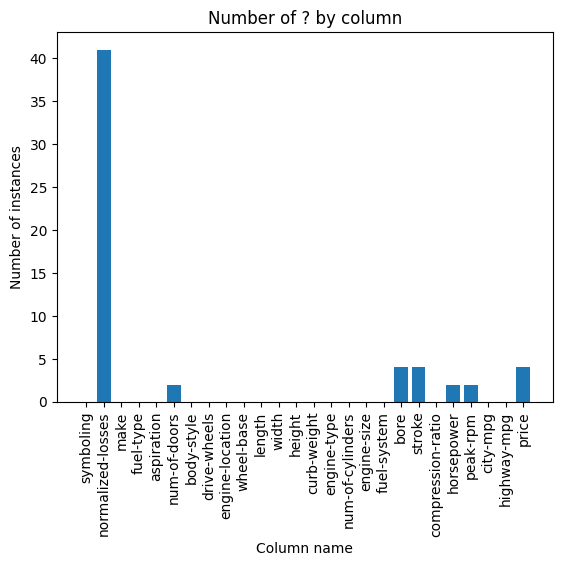

In [43]:
def finder(x):
    x = list(x)
    y = len([i for i in x if '?' in i])
    return y
case = weird.apply(finder).reset_index(name = 'count of ?')
plt.bar(x = case['index'],height = case['count of ?'])
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of instances')
plt.xlabel('Column name')
plt.title('Number of ? by column')
plt.show()

## Now onto the exploration
### Understand the characteristics of variables


Text(1.1, 13207.129353233831, 'Average Price = 13207.1')

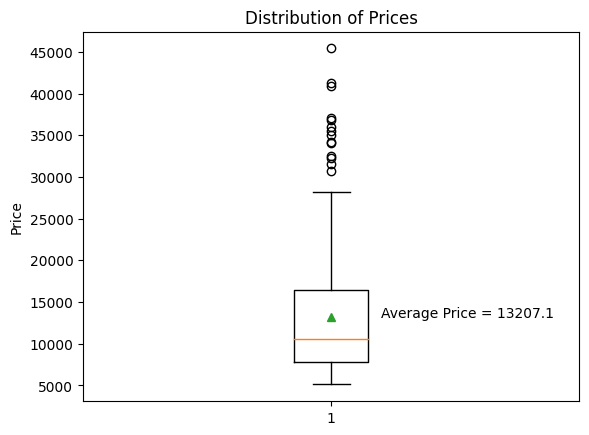

In [44]:
# Distribution of Price
plt.boxplot(cars['price'],showmeans = True)
plt.ylabel('Price')
plt.title('Distribution of Prices')
plt.text(x = 1.1, y = cars['price'].mean(),s = f"Average Price = {round(cars['price'].mean(),1)}")


C:\Users\HP\AppData\Local\Temp\ipykernel_16748\2251859553.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, 'Frequency density')

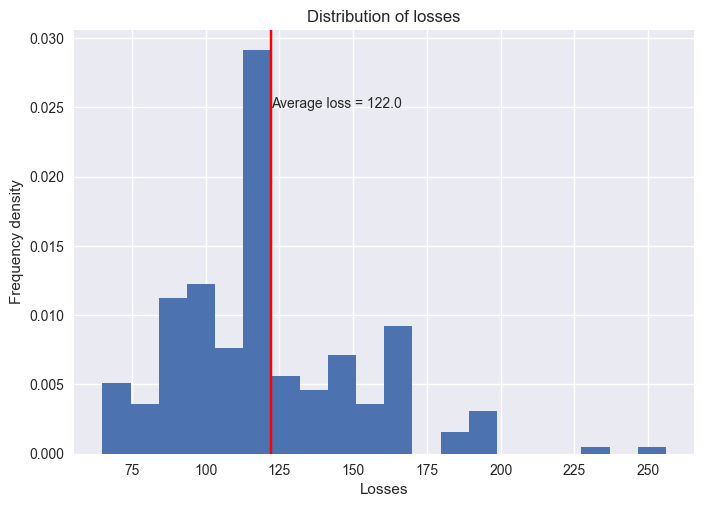

In [45]:
# Distribution of Normalised losses
plt.style.use('seaborn')
plt.hist(cars['normalized-losses'],density = True,bins = 20)
plt.axvline(cars['normalized-losses'].mean(), color = 'r')
plt.text(cars['normalized-losses'].mean(),y = 0.025,s = f"Average loss = {cars['normalized-losses'].mean()}")
plt.title('Distribution of losses')
plt.xlabel('Losses')
plt.ylabel('Frequency density')


([<matplotlib.axis.XTick at 0x20a9a8f0700>,
 [Text(0, 0, 'city-mpg'), Text(1, 0, 'highway-mpg')])

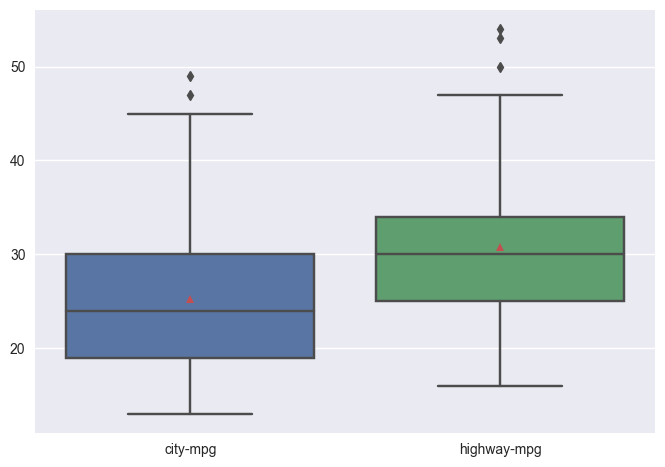

In [46]:
#MILES PER GALLON COMPARISON
box = sns.boxplot(data = [cars['city-mpg'],cars['highway-mpg']],showmeans = True)
plt.xticks(ticks = [0,1],labels = ['city-mpg','highway-mpg'])

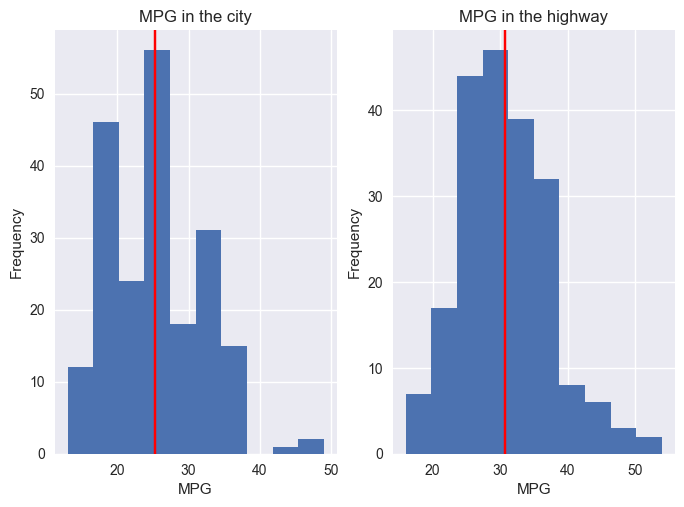

In [47]:
# create subplots
fig, axes = plt.subplots(1, 2)
# create arrays that need to be ingested by histogram
city = cars['city-mpg']
highway = cars['highway-mpg']
# create city histogram
city.hist(ax=axes[0])
axes[0].set_title('MPG in the city')
# create highway histogram
highway.hist(ax=axes[1])
axes[1].set_title('MPG in the highway')
# create labels for both histograms
for ax in axes.flat:
    ax.set(xlabel='MPG', ylabel='Frequency')
    
#averages
axes[0].axvline(cars['city-mpg'].mean(), color = 'r')
axes[1].axvline(cars['highway-mpg'].mean(), color = 'r')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16748\2728232313.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


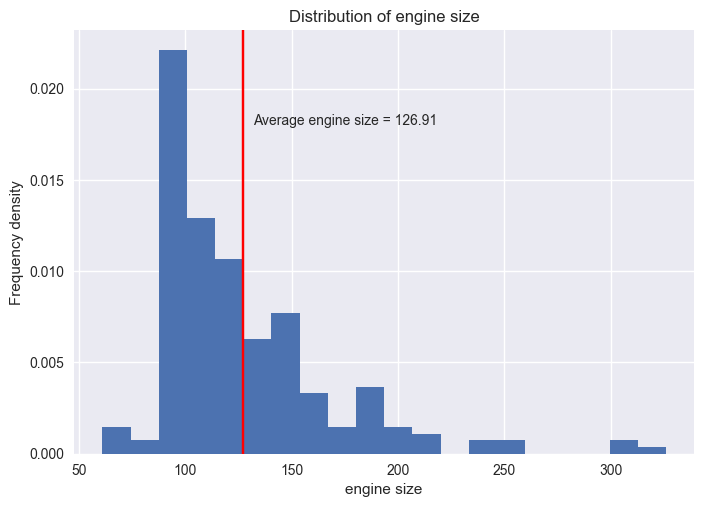

In [48]:
# Distribution of Engine size
plt.style.use('seaborn')
plt.hist(cars['engine-size'],density = True,bins = 20)
plt.axvline(cars['engine-size'].mean(), color = 'r')
plt.text(cars['engine-size'].mean()+5,y = 0.018,s = f"Average engine size = {round(cars['engine-size'].mean(),2)}")
plt.title('Distribution of engine size')
plt.xlabel('engine size')
plt.ylabel('Frequency density')
plt.show()

### Identify relationships between variables / features

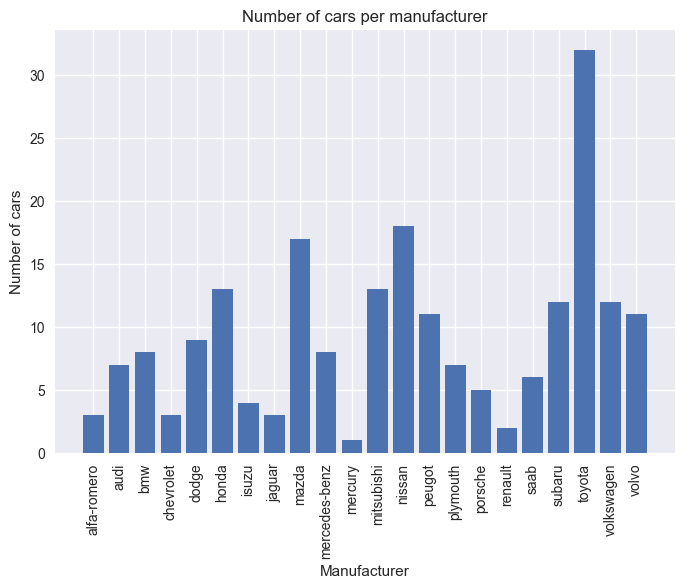

In [49]:
# NUMBER OF CARS PRODUCED BY EACH MANUFACTURER
maker_df = cars.groupby(['make'])['make'].count().reset_index(name = 'Number of cars made')
plt.bar(x = maker_df['make'],height = maker_df['Number of cars made'])
plt.xticks(rotation='vertical')
plt.ylabel('Number of cars')
plt.xlabel('Manufacturer')
plt.title('Number of cars per manufacturer')
plt.show()


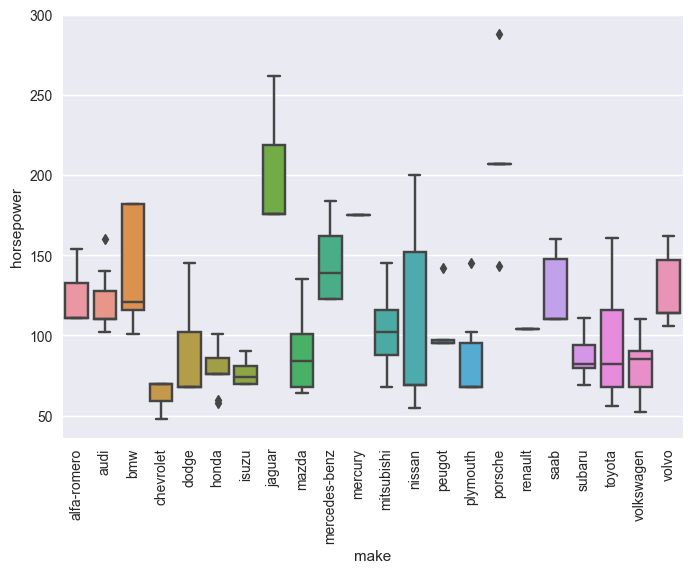

In [50]:
# Horsepower per manufacturer
sns.boxplot(x = cars['make'],y = cars['horsepower'])
plt.xticks(rotation='vertical')
plt.show()

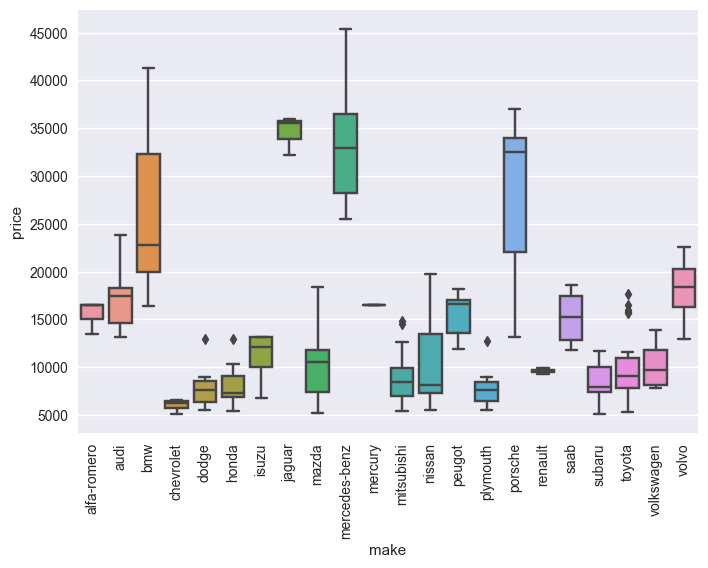

In [51]:
# PRICE by manufacturer
sns.boxplot(x = cars['make'],y = cars['price'])
plt.xticks(rotation='vertical')
plt.show()

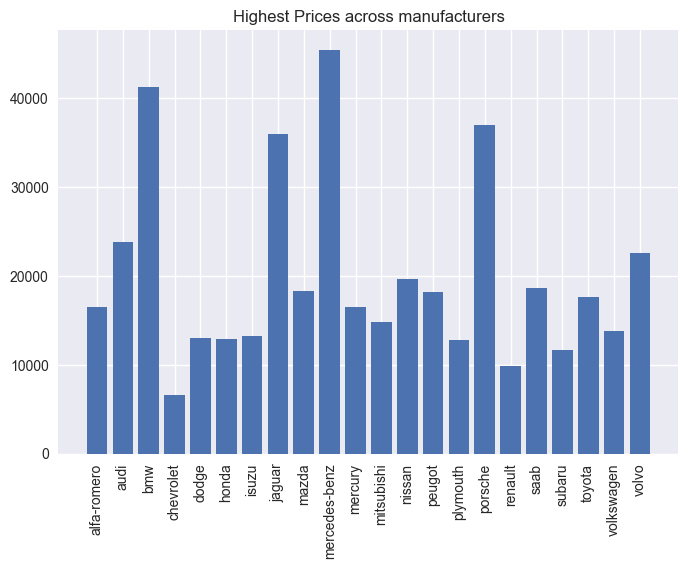

In [52]:
max_price = cars.groupby(['make'])['price'].max().reset_index(name= 'max_price')
plt.bar(x = max_price['make'],height = max_price['max_price'])
plt.title('Highest Prices across manufacturers')
plt.xticks(rotation = 'vertical')
plt.show()

In [53]:
# Which factors contribute to the price set?
corr = pd.DataFrame({'Field':cars.corr().index,'Correlation with Price':list(cars.corr()['price'])})
variables = list(corr['Field'])
corr

C:\Users\HP\AppData\Local\Temp\ipykernel_16748\2929889190.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = pd.DataFrame({'Field':cars.corr().index,'Correlation with Price':list(cars.corr()['price'])})


,Field,Correlation with Price
0,symboling,-0.082201
1,normalized-losses,0.133999
2,wheel-base,0.583168
3,length,0.682986
4,width,0.728699
5,height,0.134388
6,curb-weight,0.820825
7,engine-size,0.861752
8,bore,0.532300
9,stroke,0.082095


In [54]:
var_list = [variables[i:i+5] for i in range(0,len(variables),5)]
var_list.pop(-1)

['price']

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
C:\Users\HP\anaconda3\lib\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


<Figure size 50000x50000 with 0 Axes>

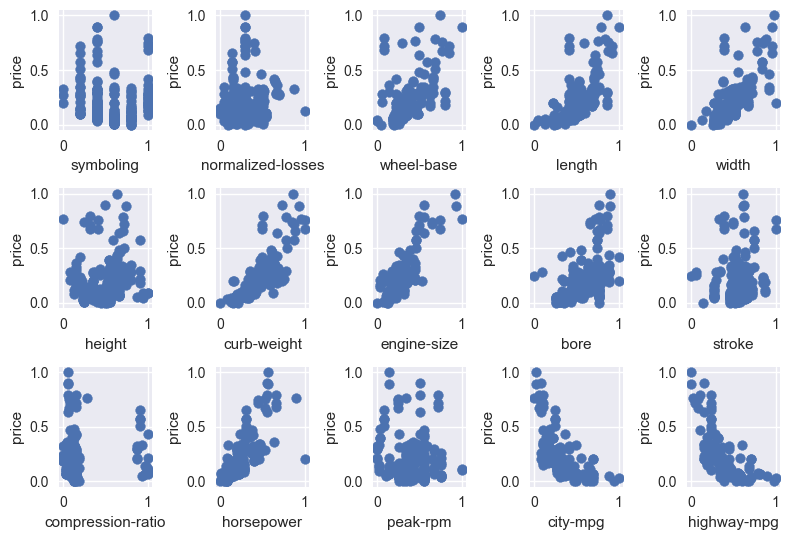

In [55]:
plt.figure(figsize=(500,500))
fig, axes = plt.subplots(3, 5)
cars['scaled_price'] = minmax_scaling(cars['price'], columns = [0])
for i in range(0,3):
    for j in range(0,5):
        axes[i][j].scatter(minmax_scaling(cars[var_list[i][j]],columns = [0]),cars['scaled_price'])
        axes[i][j].set_xlabel(var_list[i][j])
        axes[i][j].set_ylabel('price')
plt.tight_layout()

plt.show()

## Competitor Analysis

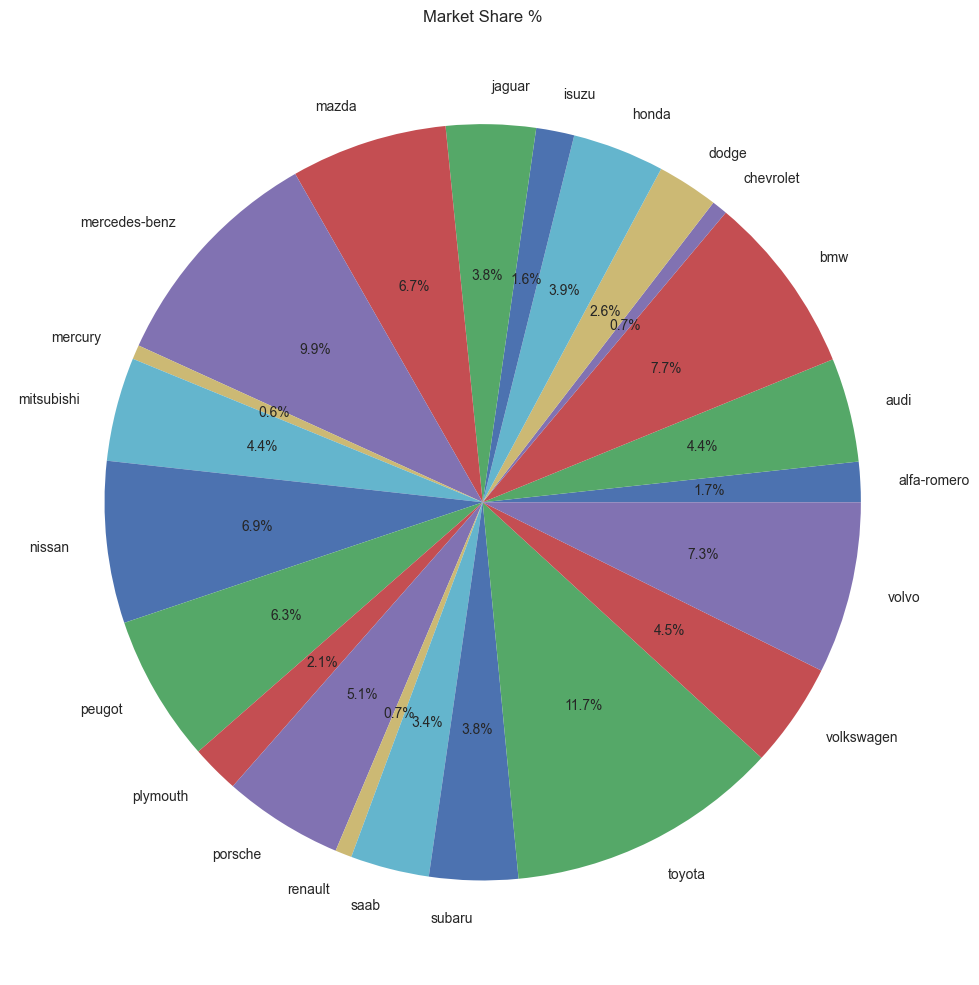

In [56]:
plt.figure(figsize=(10,10))
revenue_df = cars.groupby(['make'])['price'].sum().reset_index(name = 'revenue')
revenue_df['perc'] = round(revenue_df['revenue']/revenue_df['revenue'].sum()*100,2)
plt.pie(x = revenue_df['perc'],labels = revenue_df['make'], autopct='%1.1f%%')
plt.title('Market Share %')
plt.tight_layout()
plt.show()

### Perform Econometric analysis to understand which explanatory variables hold predictive power in explaining variation in prices

In [57]:
import statsmodels.api as sm
X = cars[variables]
X.drop(labels = ['price','symboling'],axis = 1,inplace = True)
y = cars['price']

C:\Users\HP\AppData\Local\Temp\ipykernel_16748\2977385697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(labels = ['price','symboling'],axis = 1,inplace = True)


In [58]:
X = sm.add_constant(X) 

In [59]:
res = sm.OLS(y, X).fit() 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     58.23
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           6.78e-61
Time:                        20:26:45   Log-Likelihood:                -1958.6
No. Observations:                 205   AIC:                             3947.
Df Residuals:                     190   BIC:                             3997.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.684e+04   1.74e+04     -1.542      0.125   -6.12e+04    7484.831
normalized-losses     2.5023      9.123      0.274      0.784     -15.493      20.497
wheel-base          112.4888    112.293      1.002      0.318    -109.012     333.989
length              -45.1403     61.693     -0.732      0.465    -166.832      76.551
width               146.8719    274.002      0.536      0.593    -393.605     687.348
height              110.8663    162.202      0.684      0.495    -209.081     430.814
curb-weight           1.8531      1.940      0.955      0.341      -1.973       5.680
engine-size         135.5597     15.425      8.789      0.000     105.134     165.985
bore              -1160.8534   1343.829     -0.864      0.389   -3811.593    1489.887
stroke            -2989.8202    864.866     -3.457      0.001   -4695.792   -1283.848
compression-ratio   290.8233     92.307      3.151      0.002     108.746     472.901
horsepower           -0.8153     18.369     -0.044      0.965     -37.049      35.418
peak-rpm              2.7225      0.755      3.605      0.000       1.233       4.212
city-mpg           -182.8678    200.581     -0.912      0.363    -578.520     212.785
highway-mpg           9.9464    179.288      0.055      0.956    -343.704     363.597
==============================================================================
Omnibus:                       25.060   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.493
Skew:                           0.246   Prob(JB):                     1.02e-24
Kurtosis:                       6.563   Cond. No.                     4.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] =  [variance_inflation_factor(X, i) for i in range(len(X.columns))]

In [62]:
vif_data = vif_data.drop(0)
vif_data

,feature,VIF
1,normalized-losses,1.356074
2,wheel-base,7.423198
3,length,9.404806
4,width,5.608959
5,height,2.550246
6,curb-weight,16.563042
7,engine-size,6.697962
8,bore,2.150619
9,stroke,1.194206
10,compression-ratio,2.182385


In [63]:
X.corr()
X.drop(['const'],axis = 1).corr().style.background_gradient(axis=0)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
normalized-losses,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221
wheel-base,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082
length,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662
width,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218
height,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358
curb-weight,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465
engine-size,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470
bore,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992
stroke,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961
compression-ratio,-0.114525,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005201,0.186105,1.000000,-0.205740,-0.435936,0.324701,0.265201


In [64]:
# From this chart we can see length and width and curbweight are highly correlated.
# Engine size and horsepower
# city mpg and high way mpg
# engine size and curb weight
# wheelbase and length

In [65]:
X2 = X.drop(['const','engine-size','length','bore','compression-ratio','width','highway-mpg','curb-weight','wheel-base'],axis = 1)

In [66]:
X2

,normalized-losses,height,stroke,horsepower,peak-rpm,city-mpg
0,122.0,48.8,2.680000,111.000000,5000.000000,21
1,122.0,48.8,2.680000,111.000000,5000.000000,21
2,122.0,52.4,3.470000,154.000000,5000.000000,19
3,164.0,54.3,3.400000,102.000000,5500.000000,24
4,164.0,54.3,3.400000,115.000000,5500.000000,18
5,122.0,53.1,3.400000,110.000000,5500.000000,19
6,158.0,55.7,3.400000,110.000000,5500.000000,19
7,122.0,55.7,3.400000,110.000000,5500.000000,19
8,158.0,55.9,3.400000,140.000000,5500.000000,17
9,122.0,52.0,3.400000,160.000000,5500.000000,16


In [67]:
X2 = sm.add_constant(X2)

In [68]:
res2 = sm.OLS(y, X2).fit(cov_type='HC1') 
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     35.39
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           6.46e-29
Time:                        20:26:46   Log-Likelihood:                -2021.4
No. Observations:                 205   AIC:                             4057.
Df Residuals:                     198   BIC:                             4080.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.063e+04   1.22e+04     -1.697      0.090   -4.45e+04    3197.122
normalized-losses    19.0663      8.362      2.280      0.023       2.677      35.455
height              598.5214    136.072      4.399      0.000     331.826     865.217
stroke              268.4180   1043.642      0.257      0.797   -1777.082    2313.918
horsepower          142.0936     34.526      4.116      0.000      74.424     209.764
peak-rpm             -2.6741      0.727     -3.677      0.000      -4.099      -1.249
city-mpg           -103.9628    142.756     -0.728      0.466    -383.760     175.835
==============================================================================
Omnibus:                       31.516   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.690
Skew:                           0.390   Prob(JB):                     2.57e-34
Kurtosis:                       7.183   Cond. No.                     1.99e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
X2.drop(['const'],axis = 1).corr().style.background_gradient(axis=0)

,normalized-losses,height,stroke,horsepower,peak-rpm,city-mpg
normalized-losses,1.000000,-0.370706,0.054929,0.203434,0.237748,-0.218749
height,-0.370706,1.000000,-0.055351,-0.110137,-0.320602,-0.048640
stroke,0.054929,-0.055351,1.000000,0.088264,-0.066844,-0.042179
horsepower,0.203434,-0.110137,0.088264,1.000000,0.130971,-0.803162
peak-rpm,0.237748,-0.320602,-0.066844,0.130971,1.000000,-0.113723
city-mpg,-0.218749,-0.048640,-0.042179,-0.803162,-0.113723,1.000000


In [70]:
sm.OLS(y, X2[['const','peak-rpm','city-mpg','horsepower']]).fit(cov_type='HC1').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     59.42
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.52e-27
Time:                        20:26:46   Log-Likelihood:                -2028.7
No. Observations:                 205   AIC:                             4065.
Df Residuals:                     201   BIC:                             4079.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.227e+04   8607.740      2.587      0.010    5394.831    3.91e+04
peak-rpm      -3.3834      0.745     -4.543      0.000      -4.843      -1.924
city-mpg    -204.9158    139.292     -1.471      0.141    -477.923      68.091
horsepower   129.0138     33.181      3.888      0.000      63.981     194.047
==============================================================================
Omnibus:                       28.578   Durbin-Watson:                   1.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.527
Skew:                           0.406   Prob(JB):                     1.35e-25
Kurtosis:                       6.570   Cond. No.                     7.68e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 7.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""